In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [51]:
del data['instant']

In [52]:
# Dimension of the data
data.shape

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 730 rows and 15 columns


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [54]:
# find the null values in the data

data.isnull().sum() # count of missing value ins each column


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [55]:
data.isnull().mean()*100 # percentage of missing value

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [56]:
# To Find data duplicates

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [57]:
data[data.duplicated()].shape[0]

0

In [58]:
data[data.duplicated()].shape

(0, 15)

In [59]:
list(data.columns)

['dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [60]:
len(list(data.columns))

15

In [61]:
# how to check data sample

data.rename(columns={'yr': 'year', 'mnth': 'month', 'temp': 'temperature', 'hum': 'humidity', 'dteday': 'date', 'cnt': 'count'}, inplace=True)

# data sample

data.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [62]:
# to check unique values of the columns

data.season.unique()

array([1, 2, 3, 4])

In [63]:
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [64]:
for cols in ['season', 'month', 'weekday', 'weathersit']:
  print(cols, data[cols].unique())

season [1 2 3 4]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday [6 0 1 2 3 4 5]
weathersit [2 1 3]


In [65]:
# data mapping

# mapping the season

data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

# mapping the month

data.month.replace({1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8:'Aug', 9:'Sep', 10:'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

# mapping the weathersit
data.weathersit.replace({1:'Clear', 2:"Misty", 3:'Light_snow'}, inplace=True)

# mapping the weeday

data.weekday.replace({0:'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)


In [66]:
# data sample

data.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Univariate Analysis

In [67]:
# Univariate Analysis -
    # Analysing a single column at a time (without comparing with another).
    # boxplot, 5 num summary
    # data distribution(density plot, histogram)
    # mean, mode

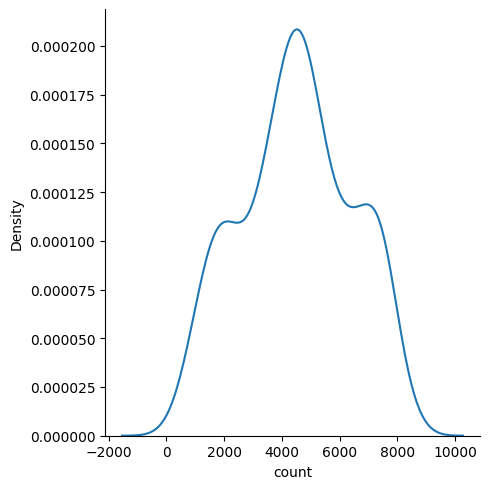

In [68]:
# univariate on target column

sns.displot(data['count'], kind='kde')
plt.show()

In [69]:
data['count'].mean()

4508.006849315068

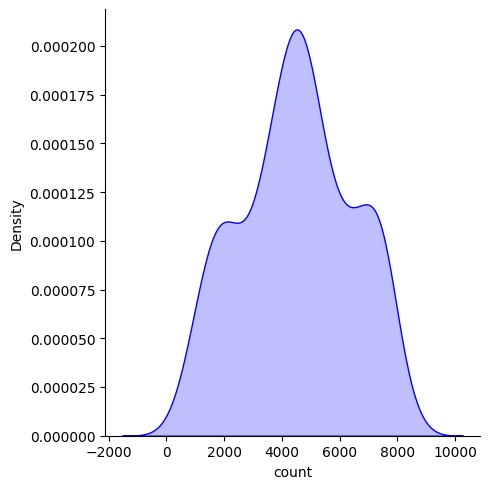

In [70]:
sns.displot(data['count'], kind='kde', color='b', fill=True)
plt.show()

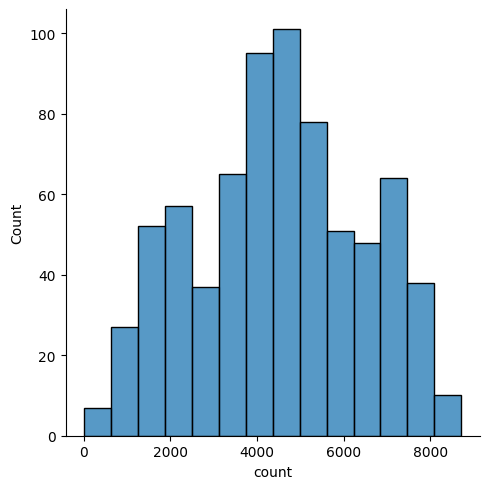

In [71]:
sns.displot(data['count'], kind='hist')
plt.show()

<Axes: xlabel='season', ylabel='count'>

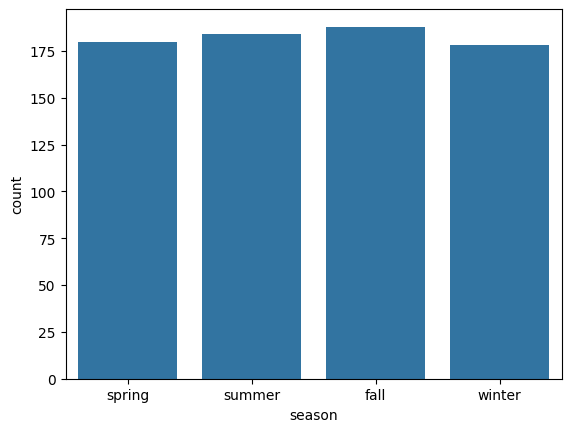

In [72]:
# univariate on categorical data
sns.countplot(data =  data, x='season')

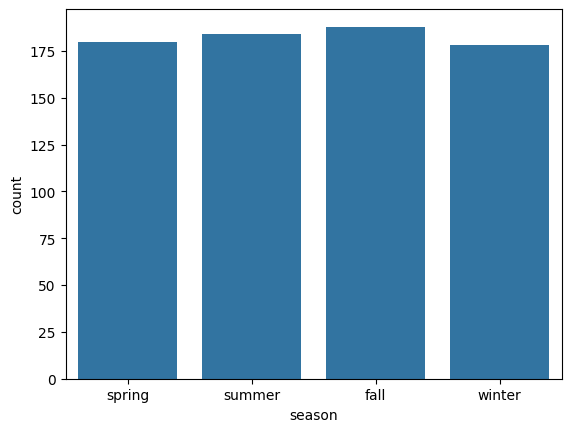

In [73]:
sns.countplot(data =  data, x='season')
plt.show()

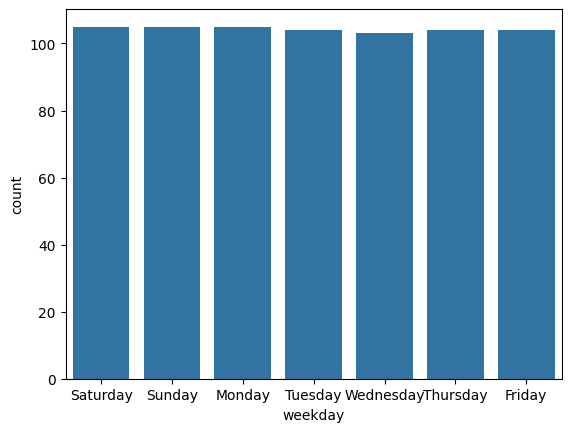

In [74]:
sns.countplot(data =  data, x='weekday')
plt.show()

In [75]:
# home Work

# create displot and boxplot for below
 # temperature
 # atemp
 # humidity
 # windspeed

# create count plot for below
 # month
 # weekday
 # weathersit

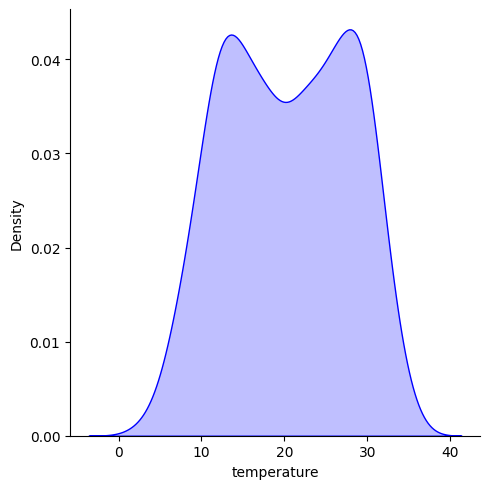

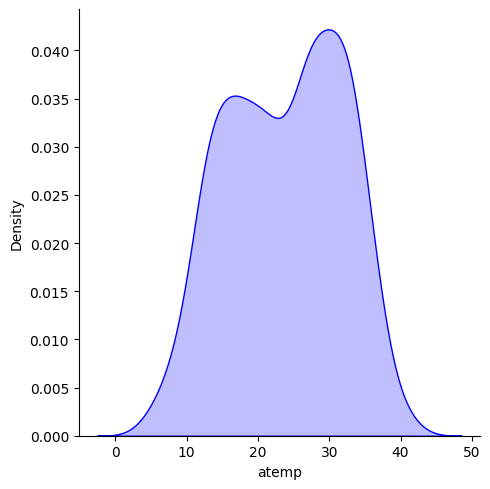

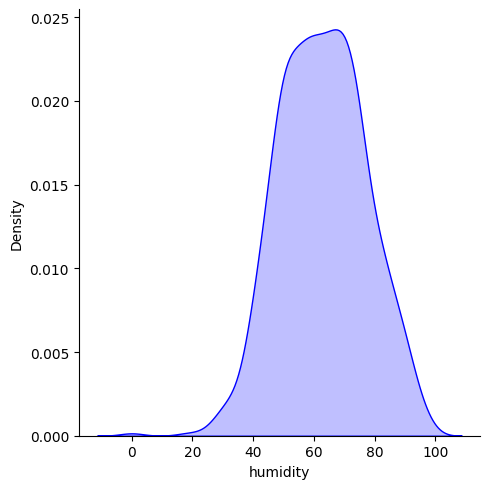

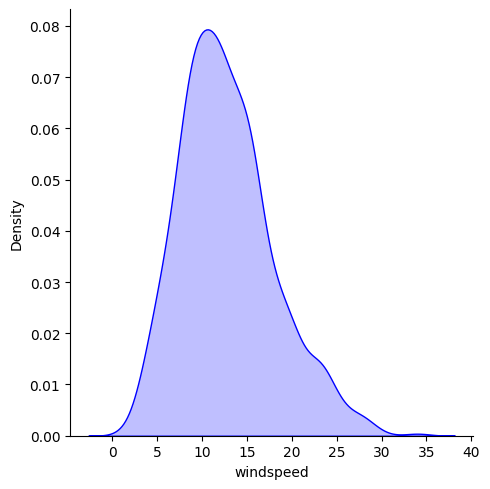

In [76]:
for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
  sns.displot(data[cols], kind= 'kde', color='b', fill=True)
  plt.show()

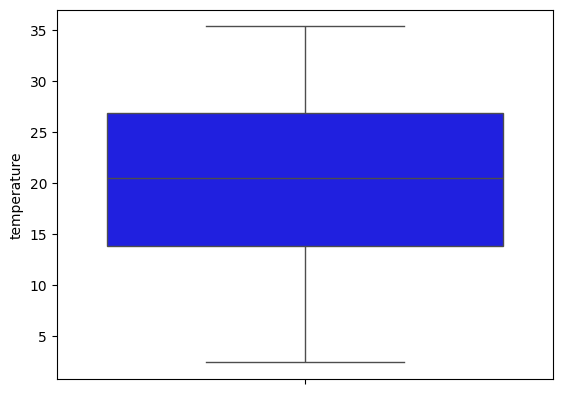

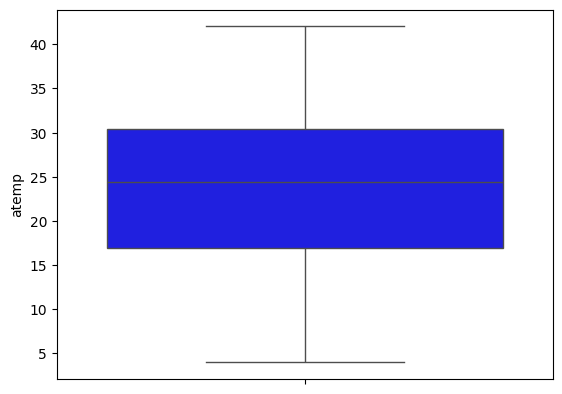

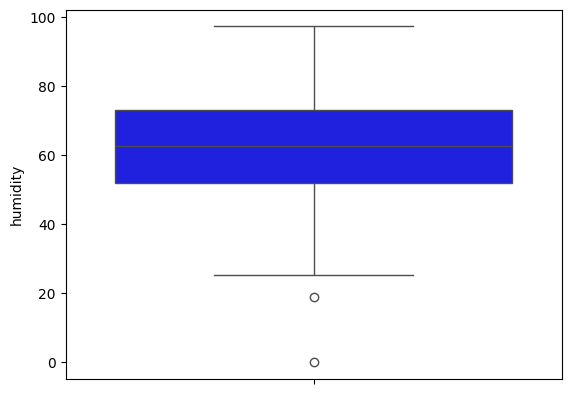

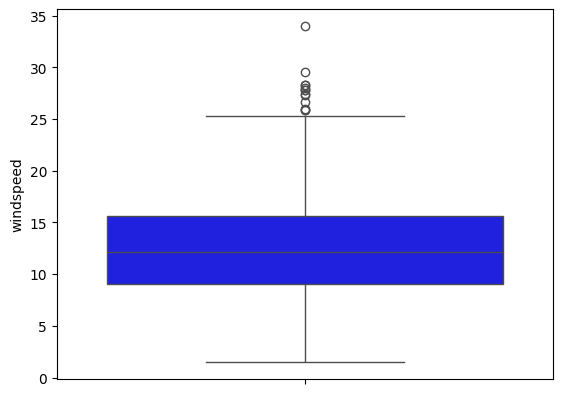

In [31]:
for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
  sns.boxplot(data[cols], color='b', fill=True)
  plt.show()

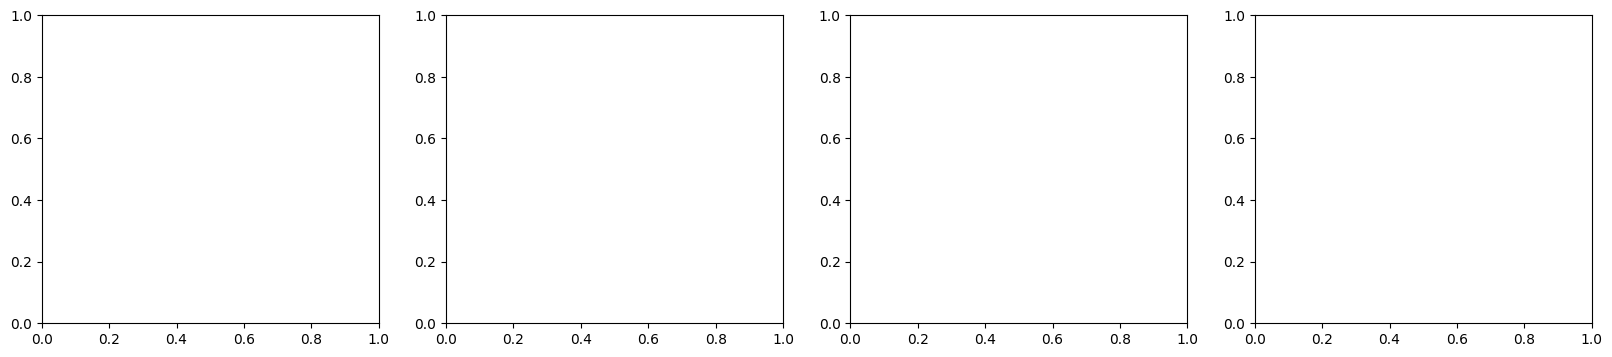

In [32]:
# creating subplots

fig = plt.figure(figsize=(20, 4))
spec = fig.add_gridspec(1, 4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])

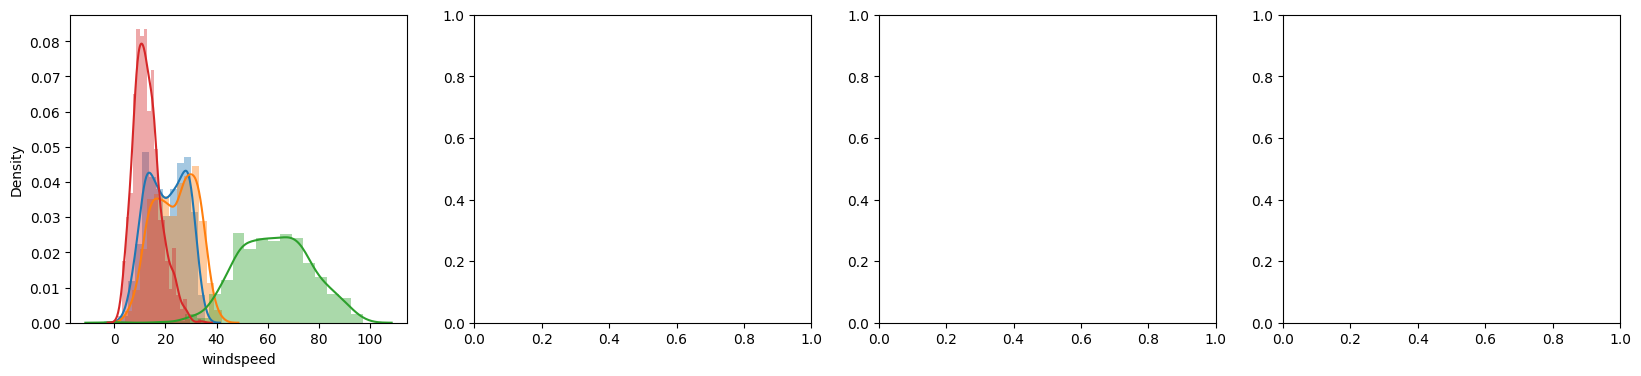

In [33]:
fig = plt.figure(figsize=(20, 4))
spec = fig.add_gridspec(1, 4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])

for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
  sns.distplot(data[cols], ax=sec_01)

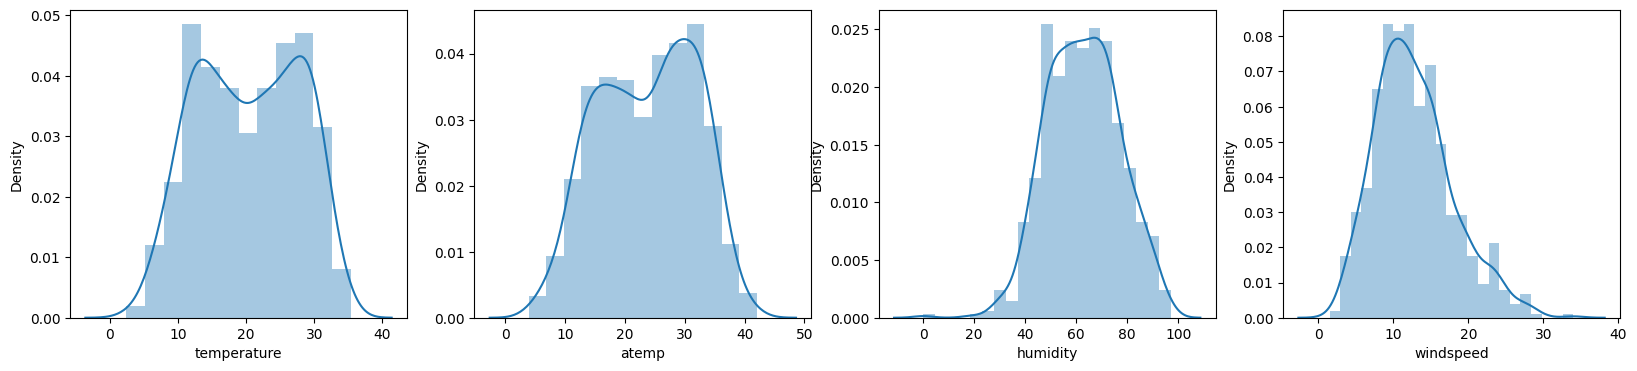

In [34]:
fig = plt.figure(figsize=(20, 4))
spec = fig.add_gridspec(1, 4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])

dist_sec = [sec_01, sec_02, sec_03, sec_04]
cnt = 0
for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
    sns.distplot(data[cols], ax=dist_sec[cnt])
    cnt += 1

plt.show()


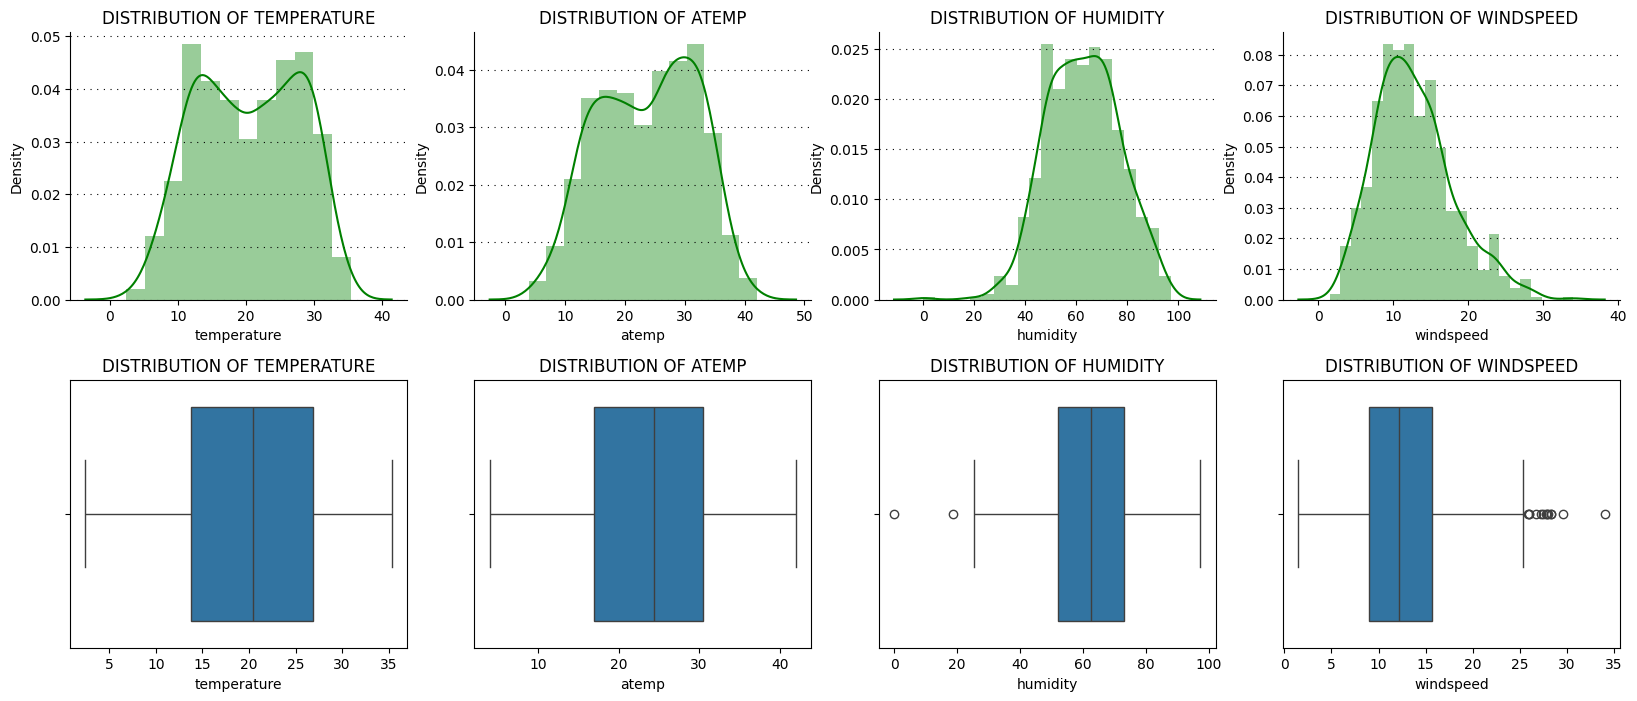

In [35]:
fig = plt.figure(figsize=(20, 8))
spec = fig.add_gridspec(2, 4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])

# plotting displot
dist_sec = [sec_01, sec_02, sec_03, sec_04]

# plotting box graph
box_sec = [sec_05, sec_06, sec_07, sec_08]
cnt = 0
for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
    sns.distplot(data[cols], ax=dist_sec[cnt], color='g')
    dist_sec[cnt].set_title('DISTRIBUTION OF ' +cols.upper())
    dist_sec[cnt].grid(color='black', ls=":", axis='y', dashes=(1,5))
    sns.boxplot(data[cols], orient='h', ax=box_sec[cnt])
    box_sec[cnt].set_title("DISTRIBUTION OF " +cols.upper())
    cnt += 1

# removing the spines
for selection in [sec_01, sec_02, sec_03, sec_04]:
  selection.spines['top'].set_visible(False)
  selection.spines['right'].set_visible(False)


plt.show()

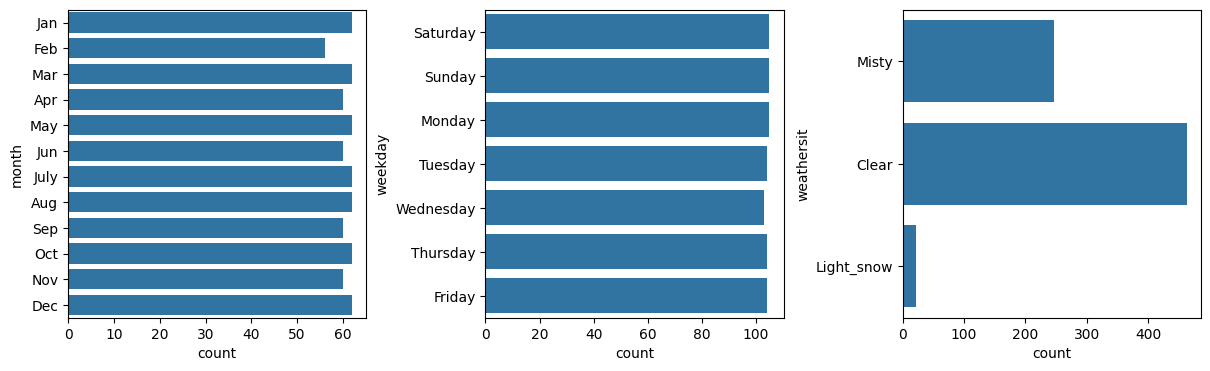

In [36]:
# creating subplots

fig = plt.figure(figsize=(20,4))
spec = fig.add_gridspec(1,4)
spec.update(wspace=0.4, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# plotting the graph
cnt_sec = [sec_01, sec_02, sec_03]
cnt = 0
for cols in ['month', 'weekday', 'weathersit']:
  sns.countplot(data[cols], ax=cnt_sec[cnt])
  cnt += 1

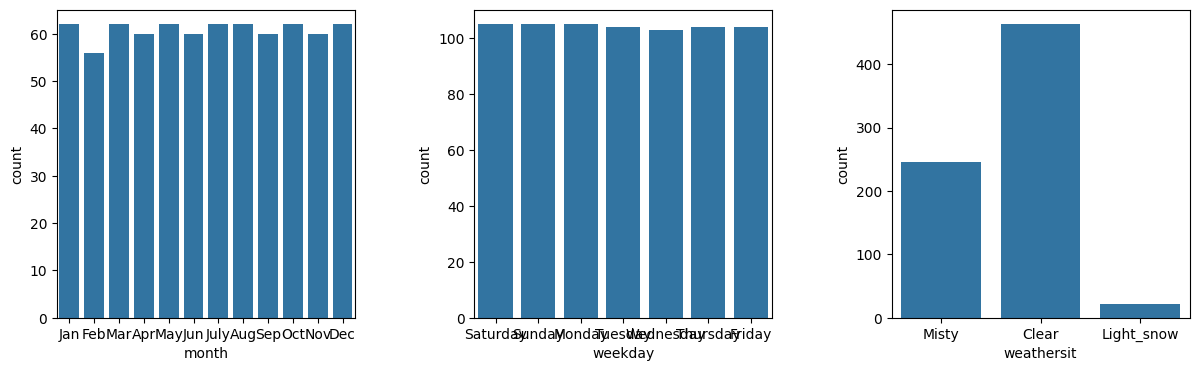

In [37]:
# creating subplots

fig = plt.figure(figsize=(20,4))
spec = fig.add_gridspec(1,4)
spec.update(wspace=0.4, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# plotting the graph
cnt_sec = [sec_01, sec_02, sec_03]
cnt = 0
for cols in ['month', 'weekday', 'weathersit']:
  sns.countplot(data, x=cols, ax=cnt_sec[cnt])
  cnt += 1

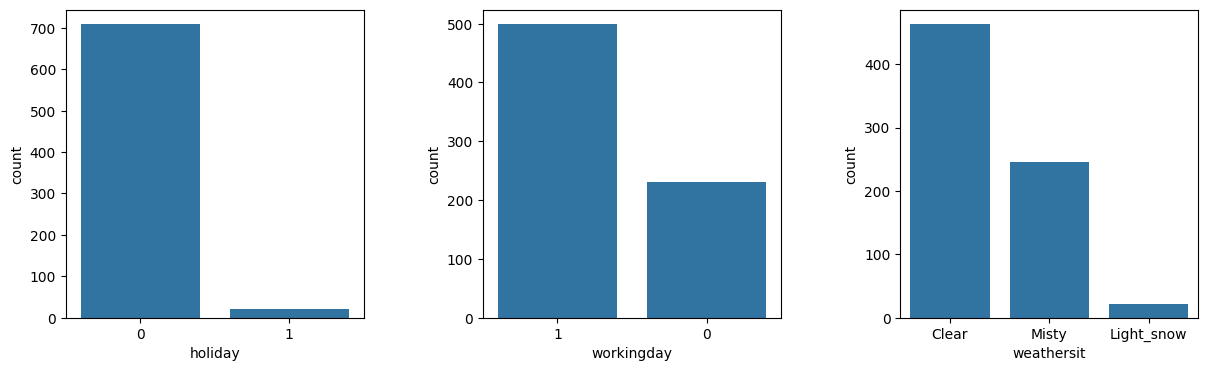

In [38]:
# creating subplots

fig = plt.figure(figsize=(20,4))
spec = fig.add_gridspec(1,4)
spec.update(wspace=0.4, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# plotting the graph with highehst to lowest
cnt_sec = [sec_01, sec_02, sec_03]
cnt = 0
for cols in ['holiday', 'workingday', 'weathersit']:
  sns.countplot(data, x=cols, ax=cnt_sec[cnt], order=data[cols].value_counts().index)
  cnt += 1

In [39]:
data['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [40]:
data['holiday'].value_counts().index

Index([0, 1], dtype='int64', name='holiday')

# Bi-Variate Analysis

<Axes: >

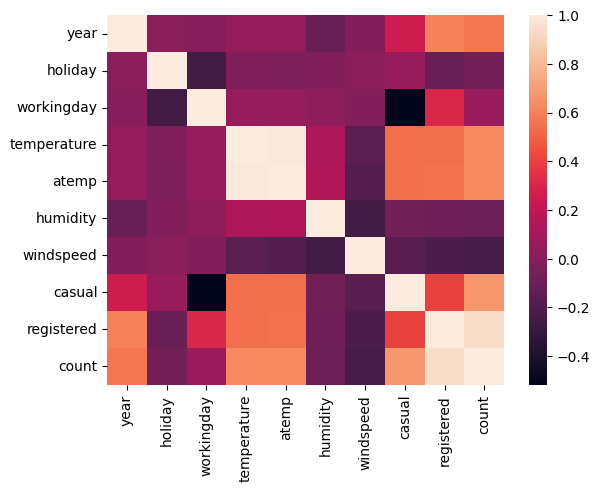

In [41]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

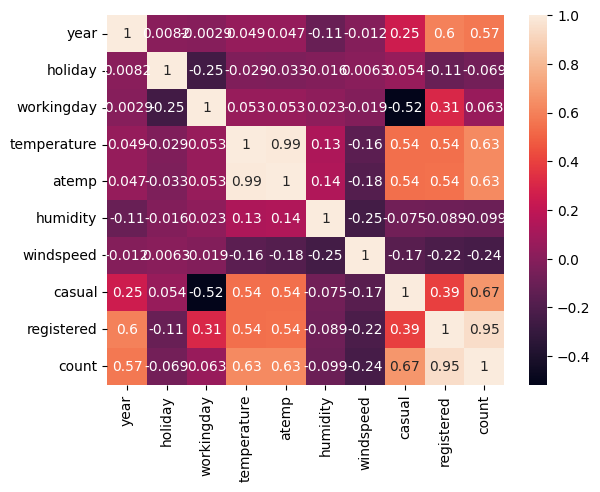

In [42]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

<Axes: >

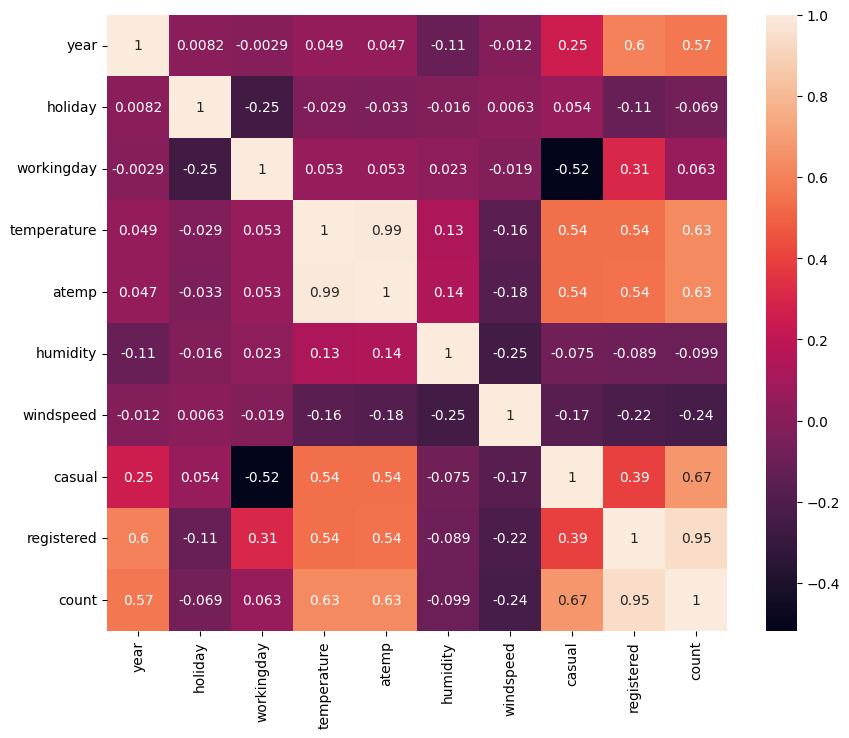

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)

<Axes: >

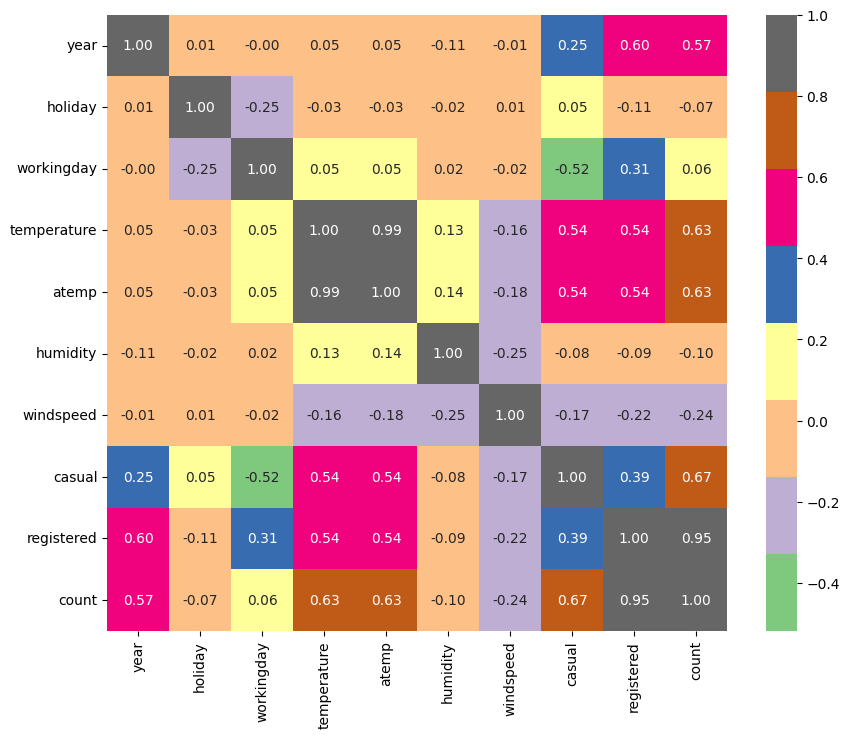

In [44]:


plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Accent')

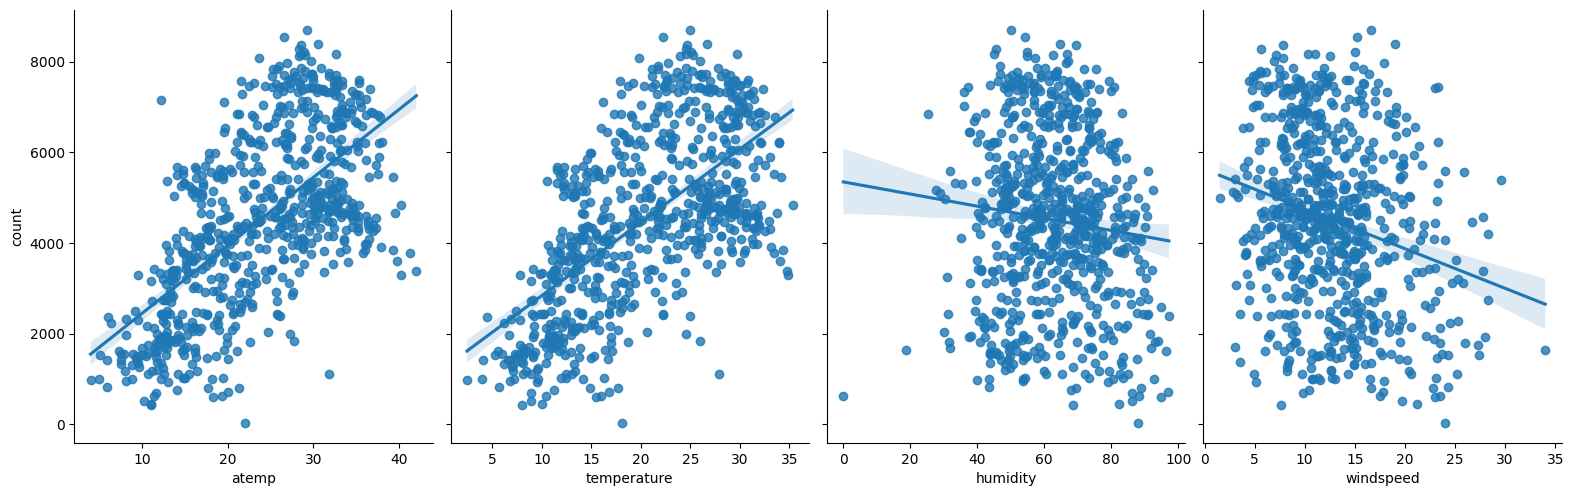

In [45]:
# continious variable with target

sns.pairplot(data, x_vars=['atemp', 'temperature', 'humidity', 'windspeed'], y_vars=['count'], kind='reg', height=5, aspect=0.8)
plt.show()

# INFERENCE:

1. Demand of the rentals is high positive correlation with the temperature and atemp.
2. Eventhough humidity is scattered around it has little negative correlation with rentals.
3. Eventhough windspeed is scattered elsewhere, demand of rental decreases with increase in windspeed.




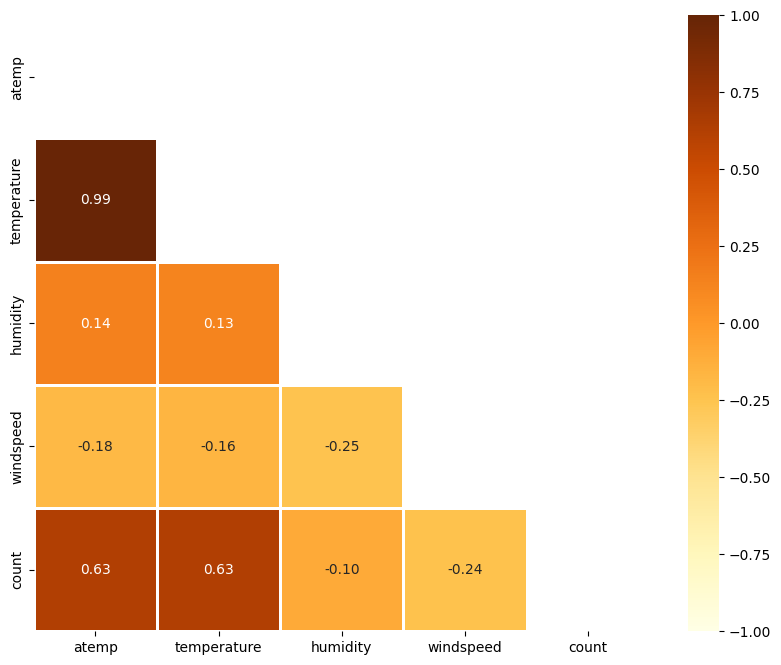

In [46]:
# corelation map

feats = ['atemp', 'temperature', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(10,8))
sns.heatmap(data[feats].corr(), annot=True, fmt='.2f', vmax=1, vmin=-1, mask=np.triu(data[feats].corr()), linewidths=1, linecolor='white', square=True, cmap='YlOrBr')
plt.show()